In [8]:
%run create_random_baseline.py

Output run file is saved at runs/en_val_baseline_random.csv


In [9]:
%run evaluation --ground-truth-path data_round_1/sentences_en_val.csv --runfile-path runs/en_val_baseline_random.csv

Macro-averaged F1 score for is_relevant variable is: 49.76
Accuracy for sector_ids variable is: 44.57
HumImpact Score is: 47.17
{'relevance_f1_score_macro': 0.49764958343808857, 'sectorids_accuracy': 0.44566666666666743, 'HumImpact': 0.47165812505237803}


# 1 Imports and Load Files

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import os
from ast import literal_eval
import itertools


In [20]:
data_location = "data_round_1"
train_documents = pd.read_csv(os.path.join(data_location,"documents_en_train.csv"))
validation_documents = pd.read_csv(os.path.join(data_location,"documents_en_val.csv"))
test_documents = pd.read_csv(os.path.join(data_location,"documents_en_test.csv"))

train_sentences = pd.read_csv(os.path.join(data_location,"sentences_en_train.csv"), converters={'sector_ids': literal_eval})
validation_sentences = pd.read_csv(os.path.join(data_location,"sentences_en_val.csv"), converters={'sector_ids': literal_eval})
test_sentences = pd.read_csv(os.path.join(data_location,"sentences_en_test.csv"), converters={'sector_ids': literal_eval})

display(HTML(train_documents.head(2).to_html()))
display(HTML(train_sentences.head(2).to_html()))

,project_name,country_code,lang_code,doc_id,doc_text,doc_url
0,IMMAP/DFS Syria,SYR,en,48582,"This website uses cookies to improve your experience. We'll assume you're ok with this, but you can opt-out if you wish.Accept",https://www.syriahr.com/en/203844/
1,IMMAP/DFS Syria,SYR,en,41032,Please enable Cookies and reload the page.\n\nThis process is automatic. Your browser will redirect to your requested content shortly.\n\nPlease allow up to 5 seconds…,https://www.syriahr.com/en/187230/


,doc_id,sentence_id,sentence_text,is_relevant,sector_ids
0,51657,0,"New Salesian youth center in La Cecilia district serves more than 100 youth (MissionNewswire) Salesian missionaries have opened a youth center in the La Cecilia district of Armenia, Colombia.",0,[]
1,51657,1,Armenia is at the center of the Colombian coffee growing axis.,0,[]


# 2 Document Statistics

Length (chars) of a document (train): Mean: 16438.691326530614, Min: 26, Max: 1181981
Length (chars) of a document (validation): Mean: 19951.268221574344, Min: 126, Max: 962293
Length (chars) of a document (test): Mean: 23002.349854227406, Min: 14, Max: 2011127


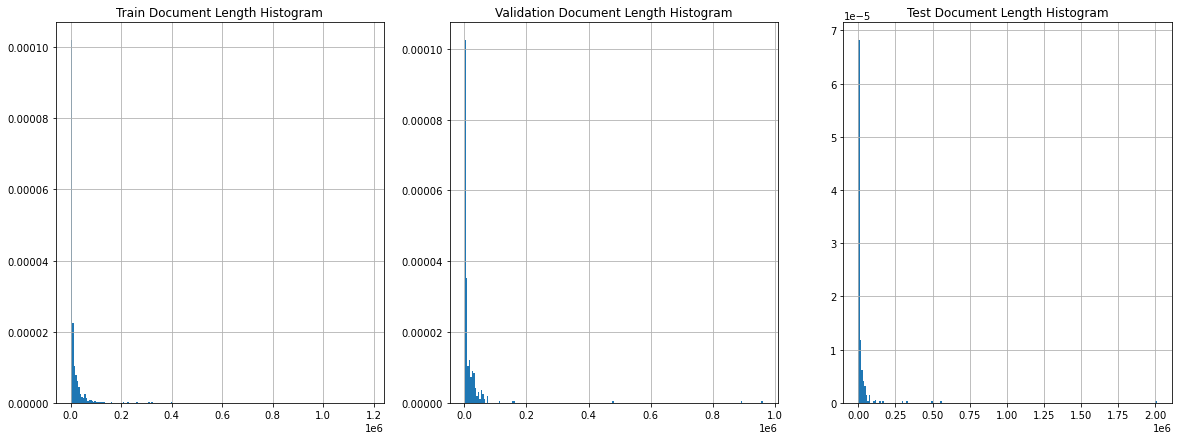

In [57]:
train_document_length = train_documents.doc_text.apply(len)
validation_document_length = validation_documents.doc_text.apply(len)
test_document_length = test_documents.doc_text.apply(len)


print(f"Length (chars) of a document (train): Mean: {train_document_length.mean()}, Min: {train_document_length.min()}, Max: {train_document_length.max()}")
print(f"Length (chars) of a document (validation): Mean: {validation_document_length.mean()}, Min: {validation_document_length.min()}, Max: {validation_document_length.max()}")
print(f"Length (chars) of a document (test): Mean: {test_document_length.mean()}, Min: {test_document_length.min()}, Max: {test_document_length.max()}")

fig, axs = plt.subplots(ncols=3, figsize=(20,7))
train_document_length.hist(bins=200, density=True, ax = axs[0])
axs[0].set_title("Train Document Length Histogram")
validation_document_length.hist(bins=200, density=True, ax = axs[1])
axs[1].set_title("Validation Document Length Histogram")
test_document_length.hist(bins=200, density=True, ax = axs[2])
axs[2].set_title("Test Document Length Histogram")
plt.show()

## Observations

- The document lenghts distributions are not equal but not too far away, all three datasets follow roughly an exponential distribution

# 3 Sentence Statistics

Length (chars) of a sentences (train): Mean: 167.48889423278789, Min: 1, Max: 46479
Length (chars) of a sentences (validation): Mean: 180.66339701959095, Min: 1, Max: 15397
Length (chars) of a sentences (test): Mean: 134.71945174548856, Min: 1, Max: 47150


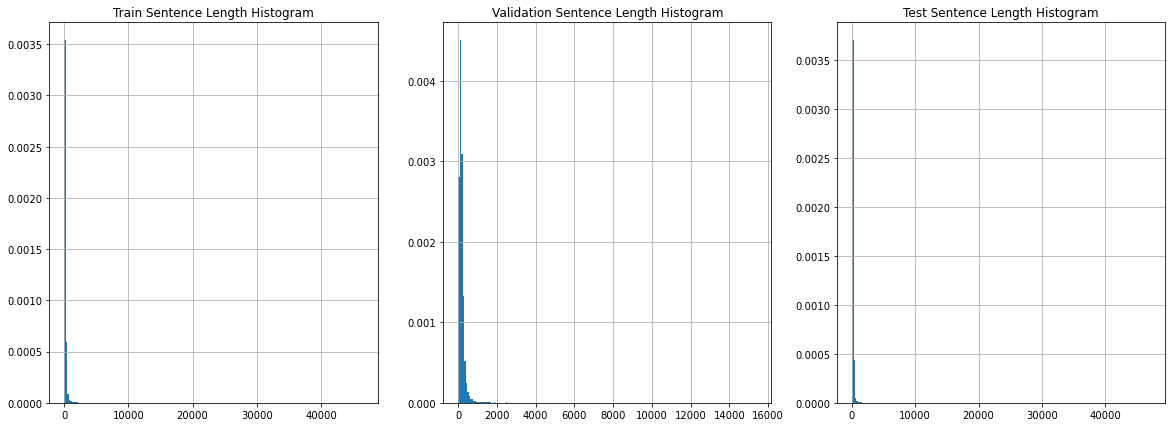

In [60]:
train_sentences_length = train_sentences.sentence_text.apply(len)
validation_sentences_length = validation_sentences.sentence_text.apply(len)
test_sentences_length = test_sentences.sentence_text.apply(len)


print(f"Length (chars) of a sentences (train): Mean: {train_sentences_length.mean()}, Min: {train_sentences_length.min()}, Max: {train_sentences_length.max()}")
print(f"Length (chars) of a sentences (validation): Mean: {validation_sentences_length.mean()}, Min: {validation_sentences_length.min()}, Max: {validation_sentences_length.max()}")
print(f"Length (chars) of a sentences (test): Mean: {test_sentences_length.mean()}, Min: {test_sentences_length.min()}, Max: {test_sentences_length.max()}")

fig, axs = plt.subplots(ncols=3, figsize=(20,7))
train_sentences_length.hist(bins=200, density=True, ax = axs[0])
axs[0].set_title("Train Sentence Length Histogram")
validation_sentences_length.hist(bins=200, density=True, ax = axs[1])
axs[1].set_title("Validation Sentence Length Histogram")
test_sentences_length.hist(bins=200, density=True, ax = axs[2])
axs[2].set_title("Test Sentence Length Histogram")
plt.show()

Number of sentences (train): 261981, Thereof relevant (%): 0.190357405741392, Of relevant has (>=1) section id: 0.7097983052870271
Number of sentences (validation): 37109, Thereof relevant (%): 0.1530980050960164, Of relevant has (>=1) section id: 0.7012380759082606
Number of sentences (test): 56689, (no label data)

Mean lenght of sector_ids (train): 0.24148697806329467
Mean lenght of sector_ids (validation): 0.129375623164192


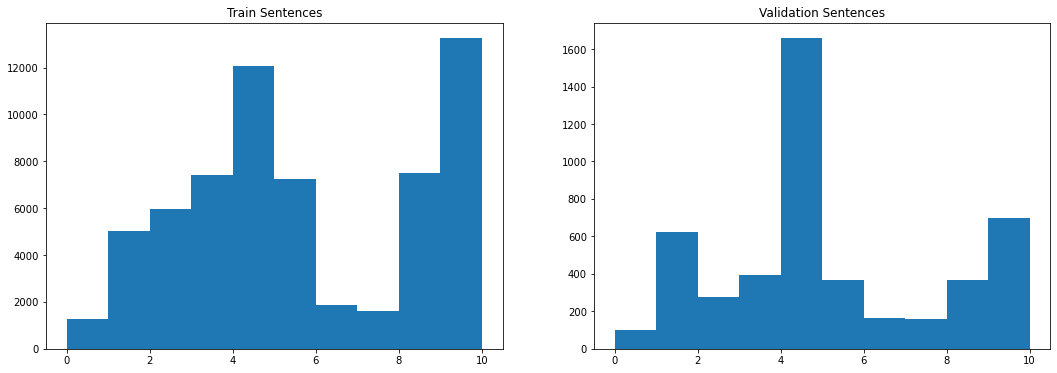

In [50]:
print(f"Number of sentences (train): {len(train_sentences)},\
 Thereof relevant (%): {train_sentences.is_relevant.sum()/(len(train_sentences)-train_sentences.is_relevant.sum())},\
 Of relevant has (>=1) section id: {train_sentences.sector_ids[train_sentences.sector_ids.apply(len) > 0].count() / train_sentences.is_relevant.sum()}")

print(f"Number of sentences (validation): {len(validation_sentences)},\
 Thereof relevant (%): {validation_sentences.is_relevant.sum()/(len(validation_sentences)-validation_sentences.is_relevant.sum())},\
 Of relevant has (>=1) section id: {validation_sentences.sector_ids[validation_sentences.sector_ids.apply(len) > 0].count() / validation_sentences.is_relevant.sum()}")

print(f"Number of sentences (test): {len(test_sentences)},\
 (no label data)")
print()
print(f"Mean lenght of sector_ids (train): {train_sentences.sector_ids.apply(len).mean()}")
print(f"Mean lenght of sector_ids (validation): {validation_sentences.sector_ids.apply(len).mean()}")
fig, axs = plt.subplots(ncols=2,figsize=(18,6))
axs[0].hist(list(itertools.chain.from_iterable(train_sentences.sector_ids.to_list())))
axs[0].set_title("Train Sentences")
axs[1].hist(list(itertools.chain.from_iterable(validation_sentences.sector_ids.to_list())))
axs[1].set_title("Validation Sentences")
plt.show()

## Observations

- The sentence length distribution is not equal but also not too far away, all three datasets follow roughly an exponential distribution.
- The Relevance distribution betwenn the train set and the validation set is similar.
- The Validation set has a different distribution in sentence section ids than the training set.